In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt   #매트플로트립.파이플롯
import seaborn as sns

# 워닝 무시
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("data/galaxy.csv")

print(df.shape)
df.head(3)

(1485, 9)


,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,NaN,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,NaN,NaN,Galaxy_Note9,contains description,0,0,0
2,0,199.99,NaN,NaN,Unknown,no description,100,2,0


### 결측치 탐지 및 처리

In [7]:
round(df.isna().sum()/ len(df), 2)

BuyItNow                0.00
startprice              0.00
carrier                 0.79
color                   0.40
productline             0.00
noDescription           0.00
charCountDescription    0.00
upperCaseDescription    0.00
sold                    0.00
dtype: float64

In [8]:
# 결측치들은 "Unknown"으로 채워넣기
#fillna()→ NaN(결측값)을 다른 값으로 채워주는 함수
df = df.fillna('Unknown')
df

,BuyItNow,startprice,carrier,color,productline,noDescription,charCountDescription,upperCaseDescription,sold
0,0,199.99,Unknown,White,Galaxy_S9,contains description,0,0,1
1,0,235.00,Unknown,Unknown,Galaxy_Note9,contains description,0,0,0
2,0,199.99,Unknown,Unknown,Unknown,no description,100,2,0
3,1,175.00,AT&T,Space Gray,Galaxy_Note9,contains description,0,0,1
4,1,100.00,Unknown,Space Gray,Galaxy_S8,contains description,0,0,1
...,...,...,...,...,...,...,...,...,...
1480,0,89.50,AT&T,Unknown,Galaxy_S7,no description,96,2,0
1481,0,239.95,Unknown,Midnight Black,Galaxy_S9,no description,97,5,1
1482,0,329.99,Unknown,Space Gray,Galaxy_Note10,no description,93,1,0
1483,0,89.00,Unknown,Midnight Black,Galaxy_S7,no description,92,2,1


In [10]:
#데이터 전체 구조를 한눈에 보여주는 함수야.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   int64  
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 104.5+ KB


### 범주형 변수 확인 및 처리

In [ ]:
# 범주형 변수 타입 
# object : 순서 x
# category : 순서 부여가 가능

In [11]:
#df → 데이터프레임 이름['BuyItNow'] → BuyItNow라는 컬럼 선택 .astype('object') → 해당 컬럼의 자료형(dtype)을 object로 변환
#= → 변환된 값을 다시 그 컬럼에 저장  
df['BuyItNow'] = df['BuyItNow'].astype('object')     #에이즈-타입

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   BuyItNow              1485 non-null   object 
 1   startprice            1485 non-null   float64
 2   carrier               1485 non-null   object 
 3   color                 1485 non-null   object 
 4   productline           1485 non-null   object 
 5   noDescription         1485 non-null   object 
 6   charCountDescription  1485 non-null   int64  
 7   upperCaseDescription  1485 non-null   int64  
 8   sold                  1485 non-null   int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 104.5+ KB


In [14]:
# 범주형 변수들 리스트화
#1️⃣select_dtypes() → 특정 자료형(dtype) 컬럼만 선택 include='object' → object 타입 컬럼만 가져와
#2️⃣.columns 선택된 컬럼들의 컬럼 이름만 가져오기 3️⃣ .tolist()Index 형태를 → 파이썬 리스트로 변환
cat_list = df.select_dtypes(include='object').columns.tolist()
cat_list

['BuyItNow', 'carrier', 'color', 'productline', 'noDescription']

In [15]:
# 범주형 변수들의 유니크값 확인
#1️⃣ for var in cat_list:👉 cat_list 안에 들어있는 컬럼 이름을 하나씩 꺼내서var라는 변수에 넣고 반복하겠다는 뜻이야.
#2️⃣ df[var]👉 해당 컬럼 선택하는 코드야.
#🔎 3️⃣ .value_counts()👉 그 컬럼 안의 값이 몇 개씩 있는지 세어주는 함수
#🔎 4️⃣ print("--------------------")컬럼별 결과를 구분하려고구분선 출력하는 거야.
for var in cat_list:
    print(df[var].value_counts())
    print("--------------------")

BuyItNow
0    818
1    667
Name: count, dtype: int64
--------------------
carrier
Unknown            1169
AT&T                177
Verizon              87
Sprint/T-Mobile      52
Name: count, dtype: int64
--------------------
color
Unknown           593
White             328
Midnight Black    274
Space Gray        180
Gold               52
Black              38
Aura Black         19
Prism Black         1
Name: count, dtype: int64
--------------------
productline
Galaxy_Note10    351
Galaxy_S8        277
Galaxy_S7        227
Unknown          204
Galaxy_S9        158
Galaxy_Note8     153
Galaxy_Note9     107
Galaxy_S10         8
Name: count, dtype: int64
--------------------
noDescription
contains description    856
no description          629
Name: count, dtype: int64
--------------------


### 색상 전처리

In [18]:
# Black 종류를 하나로 통합시키기
#1️⃣ def black(x):👉 black이라는 이름의 함수 정의👉 x는 입력값 (보통 문자열)
#2️⃣ 'Black' in x  👉 문자열 안에 "Black" 이 포함되어 있는지 확인하는 조건문
#3️⃣ 조건 결과 ✔️ True일 때 return 'Black' → 그냥 무조건 "Black" 으로 통일 
#❌ False일 때 return x → 원래 값 그대로 반환
#📌 그럼 이건 뭐가 나오냐면? black("OOO Black") 👉 "OOO Black" 안에 "Black"이 있으니까 결과:블랙

def black(x):
    if 'Black' in x:
        return 'Black'
    else:
        return x

black("OOO Black")

'Black'

In [19]:
df['color']


#Name: color → 컬럼 이름
#Length: 1485 → 총 데이터 개수 (1485개)
#dtype: object → 문자열 타입 (범주형 변수)

0                White
1              Unknown
2              Unknown
3           Space Gray
4           Space Gray
             ...      
1480           Unknown
1481    Midnight Black
1482        Space Gray
1483    Midnight Black
1484    Midnight Black
Name: color, Length: 1485, dtype: object

In [20]:
# apply 함수 
# color 각 값에 대해 black 함수를 적용함
df['color'] = df['color'].apply(black)
df['color']

0            White
1          Unknown
2          Unknown
3       Space Gray
4       Space Gray
           ...    
1480       Unknown
1481         Black
1482    Space Gray
1483         Black
1484         Black
Name: color, Length: 1485, dtype: object

In [21]:
#2️⃣ .value_counts()→ 각 값이 몇 번 나왔는지 계산  (value 뜻은 기본적으로 👉 “값) 혼자쓰이지않음.붙여서사용
df['color'].value_counts()

color
Unknown       593
Black         332
White         328
Space Gray    180
Gold           52
Name: count, dtype: int64

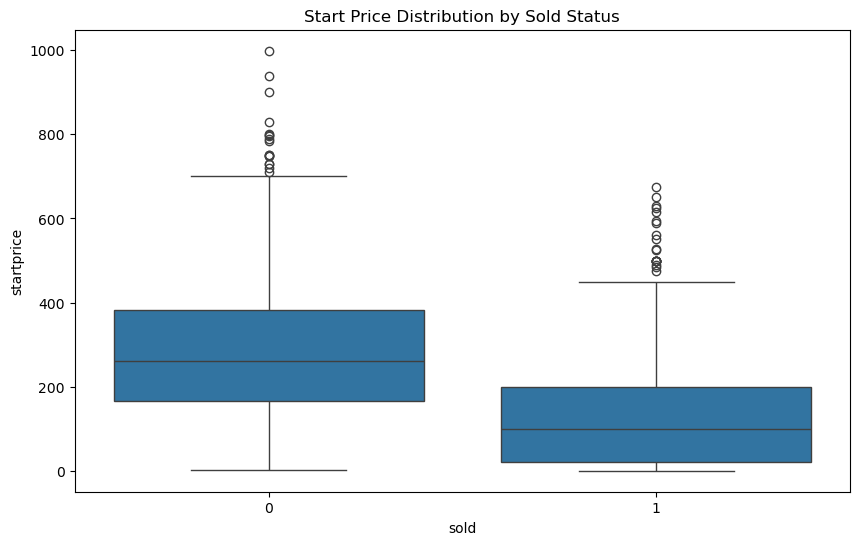

In [22]:
# 1. Start Price vs Sold (Boxplot)
plt.figure(figsize=(10, 6))
sns.boxplot(x='sold', y='startprice', data=df)
plt.title('Start Price Distribution by Sold Status');

In [ ]:
# 경매 시작가는 낮은 가격일수록 판매가 되는 경향.

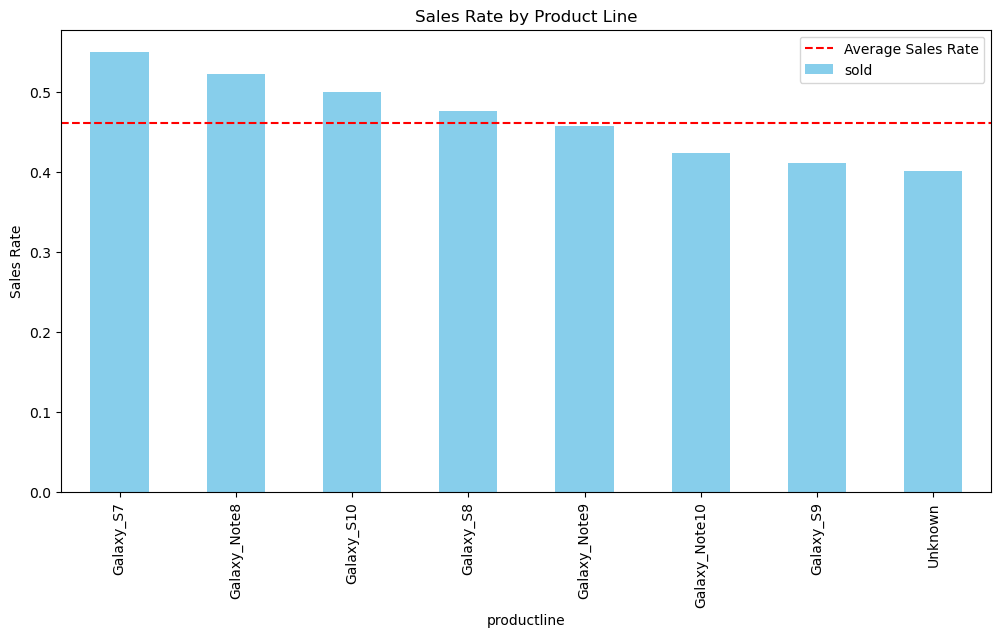

In [23]:
# 2. Sales Rate by Product Line
product_sales_rate = df.groupby('productline')['sold'].mean().sort_values(ascending=False)
product_sales_rate

plt.figure(figsize=(12, 6))
product_sales_rate.plot(kind='bar', color='skyblue')

plt.axhline(df['sold'].mean(), color='red', linestyle='--', label='Average Sales Rate') #이 코드는 그래프에 평균선(가로선)을 추가하는 코드야.
plt.title('Sales Rate by Product Line')
plt.ylabel('Sales Rate')
plt.legend();

In [ ]:
# product line 인사이트
# 분석 결과: Galaxy_S7(55%), Galaxy_Note8(52%) 등 구형 모델의 판매 성공률이 비교적 높게 나타납니다.
# 반면 Galaxy_S9(41%)나 Note10(42%)은 상대적으로 낮은 판매율을 보입니다. 
# 이는 구형 모델이 저렴한 가격 덕분에 더 쉽게 거래되기 때문일 수 있습니다.

In [24]:
# 3. Correlation analysis(상관분석)
# Select only numeric columns for correlation

# 🔎 의미
# select_dtypes() → 특정 데이터 타입만 선택
# include=['int64', 'float64'] → 정수형 + 실수형만 가져오기
# .columns → 그 컬럼 이름들만 추출
# 👉 결과:
# numeric_cols 에는 숫자형 변수 이름들만 저장됨

# df[numeric_cols] → 숫자형 컬럼들만 모은 데이터프레임
# .corr() → 피어슨 상관계수 계산
# .round(3) → 소수점 3자리로 반올림

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr().round(3)
corr

# 왜 이걸 하냐면?
# 어떤 변수가 target(sold)에 영향 큰지 확인
# 다중공선성 확인
# 모델 전 변수 선택 참고

,startprice,charCountDescription,upperCaseDescription,sold
startprice,1.000,-0.079,-0.037,-0.444
charCountDescription,-0.079,1.000,0.395,-0.073
upperCaseDescription,-0.037,0.395,1.000,-0.059
sold,-0.444,-0.073,-0.059,1.000


In [ ]:
# 📊 상관관계 해석
# 변수	           sold와의 상관계수	해석
# startprice	            -0.444	   중간 정도 음의 상관
# charCountDescription	-0.073	   거의 관계 없음
# upperCaseDescription	-0.059	   거의 관계 없음

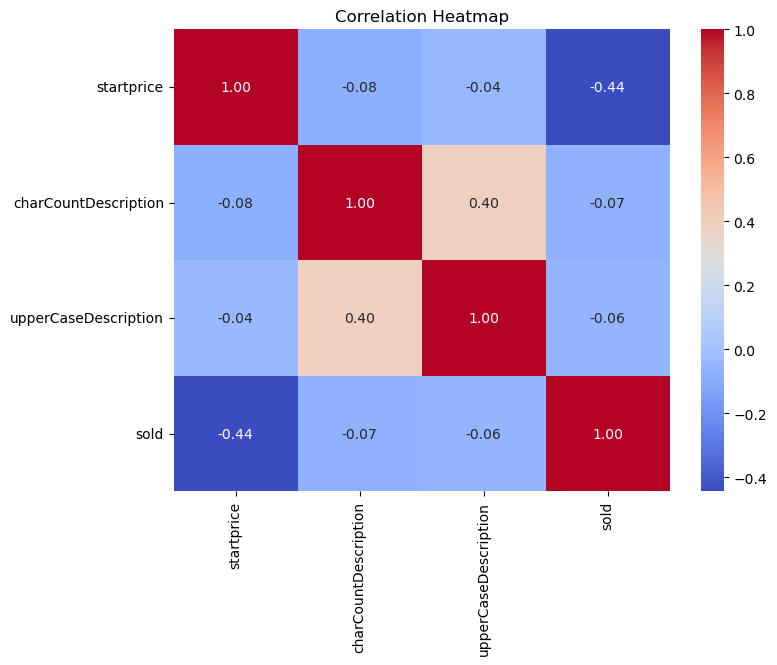

In [25]:
# 상관계수 히트맵 

#corr → 우리가 만든 상관관계 행렬 / annot=True👉 각 칸에 숫자(상관계수 값)를 직접 표시 없으면 색만 나오고 숫자는 안 보임.
# cmap='coolwarm'👉 색상 테마 설정🔵 파란색 → 음의 상관 (-)🔴 빨간색 → 양의 상관 (+) 흰색 → 0 근처
#🔹 4️⃣ fmt=".2f"  👉 소수점 2자리까지 표시
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap');

# 로지스틱 회귀 모델링

In [ ]:
'''
📌 1️⃣ 로지스틱 회귀란?
👉 결과가 0 또는 1 같은 “분류 문제”를 예측하는 통계/머신러닝 모델
예:
판매됨(sold) = 1
판매 안됨 = 0

합격 = 1
불합격 = 0

스팸 = 1
정상메일 = 0
'''

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1485 entries, 0 to 1484
Data columns (total 25 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   startprice                          1485 non-null   float64
 1   charCountDescription                1485 non-null   int64  
 2   upperCaseDescription                1485 non-null   int64  
 3   sold                                1485 non-null   int64  
 4   BuyItNow_0                          1485 non-null   int64  
 5   BuyItNow_1                          1485 non-null   int64  
 6   carrier_AT&T                        1485 non-null   int64  
 7   carrier_Sprint/T-Mobile             1485 non-null   int64  
 8   carrier_Unknown                     1485 non-null   int64  
 9   carrier_Verizon                     1485 non-null   int64  
 10  color_Black                         1485 non-null   int64  
 11  color_Gold                          1485 no

In [34]:
# 범주형 -> 수치형 변환
#🔹 1️⃣ pd.get_dummies(df) 👉 원핫인코딩(One-Hot Encoding) 수행  즉,범주형 데이터를 0과 1로 된 새로운 컬럼들로 바꾸는 것
#🔹 2️⃣ dtype='int'👉 새로 만들어지는 컬럼을 정수형(int) 으로 만들겠다는 뜻
#기본값은 bool(True/False)일 수도 있는데int로 하면:True → 1False → 0 이렇게 깔끔하게 저장됨 👍

df = pd.get_dummies(df, dtype='int' )
df

,startprice,charCountDescription,upperCaseDescription,sold,BuyItNow_0,BuyItNow_1,carrier_AT&T,carrier_Sprint/T-Mobile,carrier_Unknown,carrier_Verizon,...,productline_Galaxy_Note10,productline_Galaxy_Note8,productline_Galaxy_Note9,productline_Galaxy_S10,productline_Galaxy_S7,productline_Galaxy_S8,productline_Galaxy_S9,productline_Unknown,noDescription_contains description,noDescription_no description
0,199.99,0,0,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
1,235.00,0,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,199.99,100,2,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,1
3,175.00,0,0,1,0,1,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,100.00,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1480,89.50,96,2,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1481,239.95,97,5,1,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1482,329.99,93,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
1483,89.00,92,2,1,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [37]:
# 학습, 테스트 데이터 분리
#이 코드는 모델 학습을 위해 데이터를 훈련용 / 테스트용으로 나누는 과정이야.
#한 줄씩 설명해줄게 👇

#1️⃣ 라이브러리 불러오기👉 scikit-learn에서 데이터를 나누는 함수 train_test_split 가져오는 것
from sklearn.model_selection import train_test_split
#🔹 2️⃣ X, y 분리
#X → 입력 변수들 (독립변수, feature)
#y → 정답 값 (종속변수, target)

X = df.drop(columns=['sold'])    #👉 sold 컬럼 제거 → 나머지 변수들만 남김
y = df['sold']   #👉 우리가 예측하려는 값 (판매 여부)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# 🔎 의미
# ✔ test_size=0.2
# 👉 전체 데이터의 20%를 테스트용으로 사용
# 👉 80%는 훈련용
# 예를 들어 데이터가 1000개면:
# 800개 → 훈련(train)
# 200개 → 테스트(test)

# 📊 결과 변수 설명
# 변수	의미
# X_train	훈련용 입력 데이터
# X_test	테스트용 입력 데이터
# y_train	훈련용 정답
# y_test	테스트용 정답

In [29]:
# 로지스틱 회귀 모델 불러오기
from sklearn.linear_model import LogisticRegression  #👉 scikit-learn에서 로지스틱 회귀 모델 클래스를 가져오는 것
LR = LogisticRegression()
LR

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [38]:
# 로지스틱 회귀 적합

# 🔹 1️⃣ .fit() 이란?
# 👉 모델을 훈련(training)시키는 함수
# X_train → 입력 데이터
# y_train → 정답 데이터
# 모델이
# “입력값 → 정답” 관계를 학습하는 과정이야.

LR.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


### 성능 확인

In [39]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#📌 sklearn.metrics 가 뭐야?👉 머신러닝 모델 성능을 평가하는 함수들이 들어있는 모듈이야.
# sklearn이 뭐냐면 scikit-learn 👉 파이썬에서 머신러닝 할 때 가장 많이 쓰는 라이브러리
# metrics 뜻metrics = 측정 지표즉,👉 모델이 얼마나 잘했는지 “점수 매기는 도구”
# 🔹 1️⃣ accuracy_score👉 정확도(Accuracy) 계산
# 🔹 2️⃣ confusion_matrix👉 혼동행렬(Confusion Matrix)예측 결과를 표로 정리해줌.
# 🔹 3️⃣ classification_report👉 정밀도(Precision), 재현율(Recall), F1-score까지 한 번에 보여줌

In [40]:
# 예측 수행

#이 코드는 모델 예측 → 정확도 계산 단계야.



y_pred = LR.predict(X_test)
# 의미
# LR → 학습된 로지스틱 회귀 모델
# X_test → 테스트용 입력 데이터
# .predict() → 0 또는 1로 예측

# 성능 지표 출력
print("1. Accuracy (정확도):", accuracy_score(y_test, y_pred))

# 의미
# y_test → 실제 정답
# y_pred → 모델 예측값
# accuracy_score() → 맞춘 비율 계산

1. Accuracy (정확도): 0.8316498316498316


In [ ]:
# 📌  “무엇”의 정확도냐?
# 👉 테스트 데이터에서 sold(판매 여부)를 맞춘 비율이야.
# 즉,
# 모델이 “이 상품이 팔릴지(1), 안 팔릴지(0)”를
# 테스트 데이터 기준으로 83.16% 맞췄다

In [ ]:
#어떤기준의 팔리는지 안팔리는지 궁금하긴하네 GPT물어도 정확한 값이 안나옴

In [ ]:
# 이어서 ~ 성능 업그레이드 : 파라미터 튜닝 